<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-событий-в-стартапе,-А/А/В-тест-изменения-шрифта-в-приложении" data-toc-modified-id="Анализ-событий-в-стартапе,-А/А/В-тест-изменения-шрифта-в-приложении-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ событий в стартапе, А/А/В-тест изменения шрифта в приложении</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Загрузка-данных-и-изучение-их" data-toc-modified-id="Загрузка-данных-и-изучение-их-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных и изучение их</a></span></li><li><span><a href="#Подготовить-данные-к-анализу" data-toc-modified-id="Подготовить-данные-к-анализу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовить данные к анализу</a></span><ul class="toc-item"><li><span><a href="#Изучим-период-времени" data-toc-modified-id="Изучим-период-времени-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучим период времени</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Пользовательская-воронка" data-toc-modified-id="Пользовательская-воронка-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Пользовательская воронка</a></span></li><li><span><a href="#A/B-тест" data-toc-modified-id="A/B-тест-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>A/B тест</a></span><ul class="toc-item"><li><span><a href="#Проверка-контрольных-групп" data-toc-modified-id="Проверка-контрольных-групп-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка контрольных групп</a></span></li><li><span><a href="#Контрольные-группы-246-и-247-в-разрезе-событий" data-toc-modified-id="Контрольные-группы-246-и-247-в-разрезе-событий-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Контрольные группы 246 и 247 в разрезе событий</a></span></li><li><span><a href="#Сравнение-каждой-контрольной-группы-с-экспериментальной." data-toc-modified-id="Сравнение-каждой-контрольной-группы-с-экспериментальной.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Сравнение каждой контрольной группы с экспериментальной.</a></span></li><li><span><a href="#Сравним-данные-пользователей-объединённых-контрольных-групп-с-экспериментальной." data-toc-modified-id="Сравним-данные-пользователей-объединённых-контрольных-групп-с-экспериментальной.-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Сравним данные пользователей объединённых контрольных групп с экспериментальной.</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Анализ событий в стартапе, А/А/В-тест изменения шрифта в приложении

### Описание проекта

 Нужно разобраться, как ведут себя пользователи мобильного приложения в котором продают продукты питания. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.


### Описание данных
В вашем распоряжении набор данных `datasets/logs_exp.csv`

Каждая запись в логе — это действие пользователя, или событие.
- `EventName` — название события;
- `DeviceIDHash` — уникальный идентификатор пользователя;
- `EventTimestamp` — время события;
- `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.


**Цели исследования**:
- Изучить воронку событий
- По воронке событий посчитать, какая доля пользователей проходит на следующий шаг воронки По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки
- есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

**Основные этапы работы**:
1. Откройте файл с данными и изучите общую информацию
2. Подготовка данных
3. Изучение и проверка данных
4. Изучите воронку событий
5. Изучите результаты эксперимента

## Загрузка данных и изучение их

In [45]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Импортируем библиотеки
%matplotlib inline
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import pandas as pd 
import seaborn as sns
from scipy import stats as st
import numpy as np
from datetime import datetime as dt
import math as mth

Чтение файла

In [46]:
filepath = '/datasets/logs_exp.csv'

data = pd.read_csv('.' + filepath, sep='\t')


Вывод общей информации

In [47]:
data.info()

data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

Набор данных содержит 4 столбца, 244126 строк. Все ячейки заполнены данными, пропущенных значений нет.

Посмотрим выборочно 10 строк данных

In [48]:
data.sample(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
81302,MainScreenAppear,8433173668954577736,1564820546,246
77540,PaymentScreenSuccessful,5286407814126402577,1564812232,248
82182,OffersScreenAppear,4548398069107345873,1564822368,248
60090,MainScreenAppear,4674405625317951079,1564755120,247
127507,MainScreenAppear,4355584874001078311,1564928043,247
103126,MainScreenAppear,4411581302673934287,1564855096,248
37465,OffersScreenAppear,7773894459269476699,1564691282,246
177908,MainScreenAppear,9162645177591567063,1565060373,247
19233,MainScreenAppear,7790656657113044342,1564662786,247
100953,PaymentScreenSuccessful,2910761286178294850,1564851243,248


Колонка со временем хранится в секундах. Наименования колонок в верхнем регистре.

Для дальнейшего изучения приведем названия столбцов к общему принятому виду. Добавим колонку со временем

In [49]:
# переименуем колонки
data = data.rename(columns={
    'EventName':'event_name',
    'DeviceIDHash':'device_id',
    'EventTimestamp':'event_timestamp',
    'ExpId':'group'
})
# добавим колонку с датой события
data['event_date'] = pd.to_datetime(data['event_timestamp'], unit='s')

Просмотрим временной срез данных за какой промежуток собраны данные

In [50]:
data['event_date'].describe()

count                  244126
unique                 176654
top       2019-08-01 14:40:35
freq                        9
first     2019-07-25 04:43:36
last      2019-08-07 21:15:17
Name: event_date, dtype: object

Данные собраны в период с 25 июля по 7 августа включительно

In [51]:
data.describe().apply(lambda x: x.apply('{0:.1f}'.format))

,device_id,event_timestamp,group
count,244126.0,244126.0,244126.0
mean,4627568124590853120.0,1564913915.8,247.0
std,2642424998963707904.0,177134.3,0.8
min,6888746892508752.0,1564029816.0,246.0
25%,2372212476992240640.0,1564756580.2,246.0
50%,4623191541214045184.0,1564919395.0,247.0
75%,6932517045703054336.0,1565074511.0,248.0
max,9222603179720523776.0,1565212517.0,248.0


Можно сказать что аномальных значений нет, отрицательных также нету

In [52]:
# Узнать уникальные события
list(data['event_name'].unique())

['MainScreenAppear',
 'PaymentScreenSuccessful',
 'CartScreenAppear',
 'OffersScreenAppear',
 'Tutorial']

В данных есть 5 уникальных событий. И за весь период произошло 244126 события.

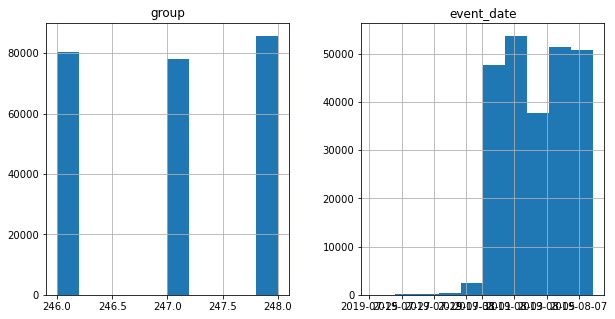

In [53]:
# Посмотрим на даты и номера тестируемых групп в данных событий
data[['group', 'event_date']].hist(figsize=(10, 5));

Групп всего 3, больше всего событий совершила группа 248. Распределение событий по данным не нормальное, все события произошли во второй половине набора данных во времени.

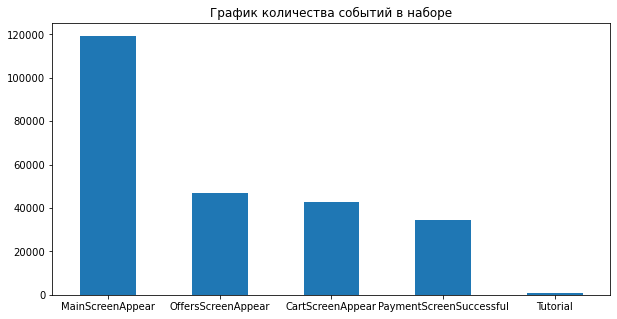

In [54]:
plt.figure(figsize=(10, 5))
data['event_name'].value_counts().plot(kind='bar', rot=0)
plt.title("График количества событий в наборе");

В данном графике мы видим  количество пользовательских событий, от просмотра **Главной страницы** до **Успешного платежа**. Обучение практически все пропускают. Событий с посетившими главную страницу около 120тысяч.

**Вывод**

- В данных нету пропущенных значений. 
- Названия столбцов не были приведены к общему виду, дата событий хранилась в секундах, что мы исправили сразу, для того что бы узнать временной промежуток выборки
- Прослеживается создание потребительской воронки. 

## Подготовить данные к анализу

Добавим колонку с датой

In [55]:
# добавим колонки даты и дня недели
data = data.assign(
    date = data['event_date'].astype('datetime64[D]'),
    days_of_week_event=lambda x : x.event_date.dt.day_name()
)

Необходим просмотреть сколько всего в наборе пользователей, сколько в среднем приходиться событий на одного пользователя, проверим присутствие пользователя в нескольких группах.  

In [56]:
# Сколько всего уникальных пользователей
cnt_users = data['device_id'].nunique()

cnt_users

7551

В тесте приняло участие 7551 пользователь

In [57]:
# Сгруппируем по девайсам и посчитаем количество событий для каждого 
event_by_users= (
    data.groupby('device_id', as_index=False)
    .agg({'event_name':'count'}).
    rename(columns={'event_name':'cnt_events_user'})
)

print(f'Среднее количество событий на 1 пользователя: {event_by_users["cnt_events_user"].mean():.1f}')

Среднее количество событий на 1 пользователя: 32.3


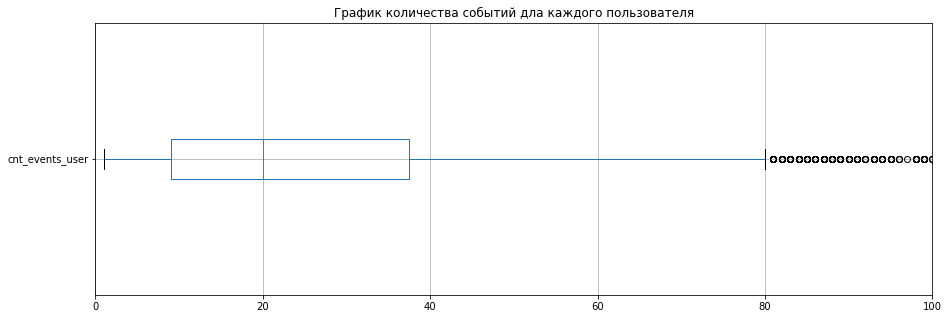

In [58]:
plt.figure(figsize=(15, 5))
plt.xlim(0, 100)
event_by_users.boxplot(column='cnt_events_user', vert=False)
plt.title('График количества событий дла каждого пользователя')
plt.show()

В среднем каждый пользователей за данный период совершил 32 события. Нормальное количество событий для одного пользователя от 1 до 80, медианна событий для пользователя равняется 20. Итого максимально нормальный показатель по событиям для пользователя совершить - 80 событий.

In [59]:
# Сгруппируем покупателей и посчитаем их в тестируемых группах,
# каждому пользователю будет присвоено в скольки группах он участвует
bad_users_group = (
    data.groupby('device_id', as_index=False)
    .agg({'group':pd.Series.nunique})
)

# Вывести группы и сколько в них человек пересекаются
bad_users_group.group.value_counts()

1    7551
Name: group, dtype: int64

Предположение что пользователи плохо разделены и пользователь может участвовать в разных тестируемых группах не подтвердилось. Качество разделения пользователей замечаний не вызывает

In [60]:
# проверим на дубликаты, и сразу посчитаем конверсию ко всей выборке
print(data.duplicated().sum())
print(f'Доля от общего данных составила: {data.duplicated().sum() / data.shape[0]:.1%}')

413
Доля от общего данных составила: 0.2%


Количество дубликатов - 413. Доля дубликатов значений ко всей выборке составила всего `0.2%`, удаляем их

In [61]:
# Удалить дубликаты, присвоить индексы
data = data.drop_duplicates().reset_index(drop=True)

### Изучим период времени


Изучим детально данные по времени. Вычислим сколько дней это заняло. Как события распределены по времени, есть ли какие-нибудь аномалии.

In [62]:
first_day = data['date'].min() # первый день
last_day = data['date'].max()  # последний день теста
print(last_day-first_day)

13 days 00:00:00


Итого у нас данные собранны за 13 дней тестирования. Сгруппируем под дням и посчитаем сколько произошло событий в каждый день.

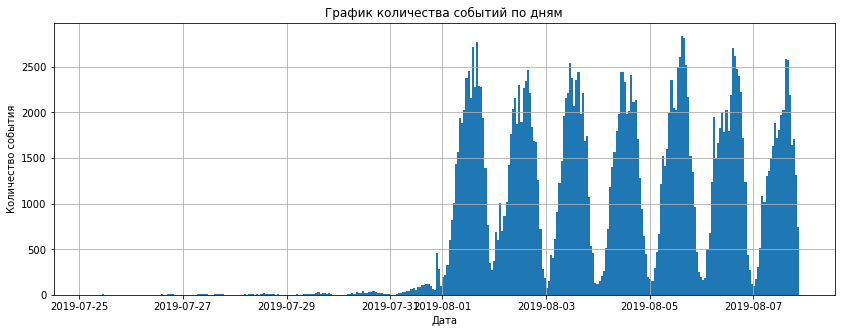

In [63]:
# подсчет событий по дням
data['event_date'].hist(bins=14*24, figsize=(14, 5))

plt.title("График количества событий по дням")
plt.xlabel('Дата')
plt.ylabel('Количество события')
plt.show()

Складывается предположение что до 1 августа происходила подготовка к тестированию по группам, в логи попало скудные доля событий от всех данных теста. Так что не вижу смысла рассматривать события раньше 1 августа.

In [64]:
(data.query('date <= "2019-07-31"').agg({'event_name':'count','device_id':'nunique'}))

event_name    2826
device_id     1451
dtype: int64

В период до 31 августа было совершено 2828 различных событий, 1451 пользователем.

In [65]:
# У нас останутся данные только после 31 августа 2019 года
clean_data = data.query('date > "2019-07-31"')

# Доля потерянных данных
print(f'Потеря данных составила: {clean_data.shape[0]/data.shape[0]-1:.1%}')

# Сколько всего осталось пользователей
print(f'Всего пользователей : {clean_data["device_id"].nunique()}')

Потеря данных составила: -1.2%
Всего пользователей : 7534


После того как убрали события по временому срезу, выборка в общем потеряла уже в среднем 1.5% данных от всего теста, потеряли 17 уникальных пользователей.

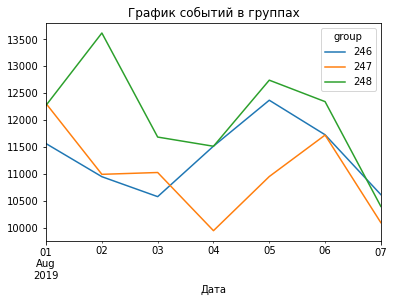

In [66]:
# Убедимся что у нас остались все 3 группы и как происходили события в группах
clean_data.pivot_table(index='date', columns='group', values='event_name', aggfunc={'event_name':'count'}).plot()
plt.title('График событий в группах')
plt.xlabel('Дата')
plt.show()

Мы убедились что все происходящие события происходят в 3 группах, никакая группа не исчезла. Тестируемая группа показывает лучшие результаты по количеству событий, только в последний день уступает лидерство.

### Вывод

Подготовили данные к дальнейшему анализу. 
- Убрали дни с события в которых произошло  минимальное их количество
- В данных были дубликаты и дни с минимальным количеством событий, в общем данные теста уменьшились на 1.5%
- В тесте присутствуют события 3 групп, пользователи по группам разделены на отлично. 
- В среднем каждый пользователь совершает 32 события.

## Пользовательская воронка

Проанализируем пользователей в разрезе совершенных их действий, необходимо посчитать сколько именно он их совершил и в каком количестве.

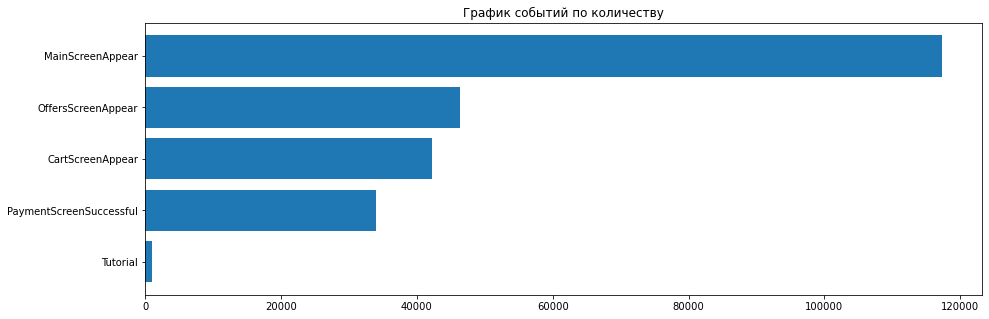

In [67]:
# Общее количество событий
temp = (
    clean_data.groupby('event_name', as_index=False)
    .agg({'date':'count', 'device_id':'nunique'})
    .rename(columns={'date':'cnt_events', 'device_id':'cnt_users'})
    .sort_values('cnt_events').reset_index(drop=True)
)

# Визуализация
plt.figure(figsize=(15, 5))
plt.barh(temp['event_name'], temp['cnt_events'])
plt.title('График событий по количеству')

plt.show()


Как мы видим формируется пользовательская воронка, обучающий этап скорее всего не относится к ней.

Посчитаем количество событий и сколько уникальных пользователей совершили их, выведем конверсию по ним в воронке.

In [68]:
# Общее количество событий и количество пользователей совершивших их
events = (
    clean_data.groupby('event_name', as_index=False)['device_id']
    .agg(['count', 'nunique'])
    .sort_values('count', ascending=False)
    .rename(columns={'count':'cnt_events', 'nunique':'total_users'})
    .reset_index())

total_num_users = clean_data['device_id'].nunique() # общее количество пользователей
print(f'Общее количество пользователей: {total_num_users}')

# Конвертация по событиям пользователей
events['conv_events'] = round(events['cnt_events']/ events['cnt_events'][0] * 100, 1)
events['conv_users'] = (events['total_users']/total_num_users).map(lambda x: '{0:.2%}'.format(x))
events.style.background_gradient('coolwarm')

Общее количество пользователей: 7534


,event_name,cnt_events,total_users,conv_events,conv_users
0,MainScreenAppear,117328,7419,100.000000,98.47%
1,OffersScreenAppear,46333,4593,39.500000,60.96%
2,CartScreenAppear,42303,3734,36.100000,49.56%
3,PaymentScreenSuccessful,33918,3539,28.900000,46.97%
4,Tutorial,1005,840,0.900000,11.15%


Посчитали количество пользователей посмотревших `главную страницу` - 7419 или 98.5% от общего количества пользователей, были на странице `предложение` уже  - 4593 (61%) пользователей, `добавили карту` - 3734 (50%), `совершили платеж` - 3539 (47%). `Обучающий этап` не пользуется популярностью его прошло 11% людей от общего количества, скорее всего пользователи считают интерфейс не таким сложным чтобы проходить его. Обучающий этап не стал бы вносить в воронку, так как из данных не ясно на каком этапе он предлагается пользователям. 

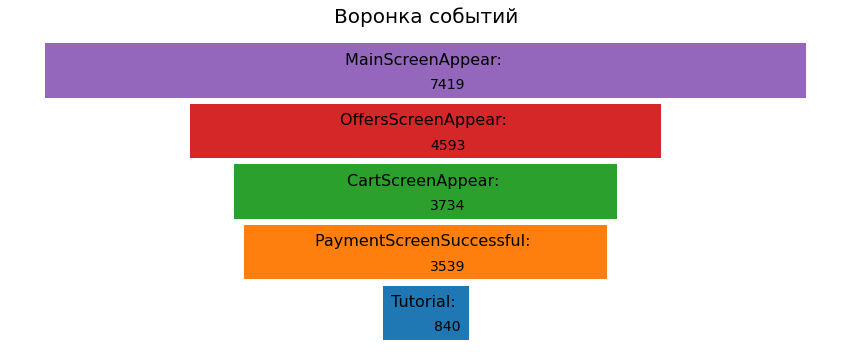

In [69]:
# Задать диапозон значений на графике 
x_max = int(temp.query('event_name == "MainScreenAppear"')['cnt_users'] * 1.1)
x_min = 0

# размер графика и расположение
fig, ax = plt.subplots(1, figsize=(15, 6))

labels = list(temp['event_name']) # Список событий
x = temp['cnt_users']            # Серия содержащая события
y = temp['event_name']            # Серия со значениями событий

# Создание воронки
for idx, val in enumerate(x):
    left= (x_max - val)/2 # отступ от левого края
    plt.barh(y[idx], x[idx], left=left, height=0.9) # График
    # Названия Событий
    plt.text(x_max/2, idx +0.1, labels[idx]+': ', ha='center', fontsize=16)
    # значения     
    plt.text(x_max/1.9, idx-.3, x[idx], ha='center', fontsize=14)
    
# Визуализация
plt.title('Воронка событий', fontsize=20)
plt.axis('off')
plt.xlim(x_min, x_max)
plt.show;

Сформировали наглядно покупательскую воронку событий. Этап с обучением необходимо убирать. И смотреть события в разрезу уже тестируемых групп.

In [70]:
# Убрать события "Tutorial"
clean_data = clean_data.query('event_name != "Tutorial"')

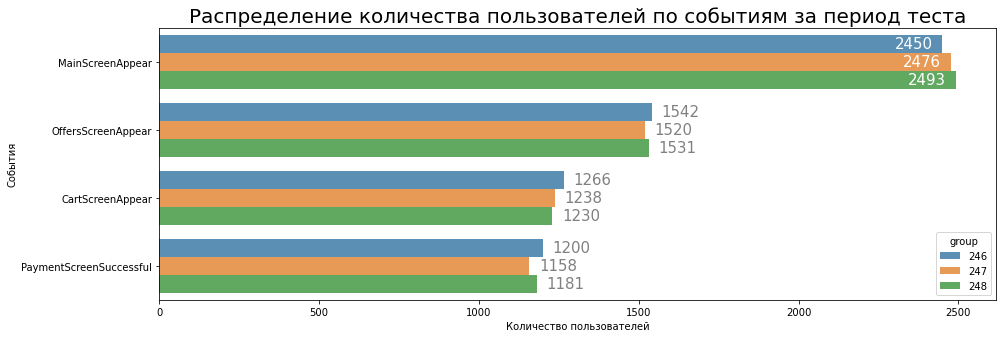

In [71]:
# Подсчитать каждое события для каждой группы
pivot_by_group = (
    clean_data.pivot_table(index=['group', 'event_name'],
                           values='device_id', aggfunc=['count', 'nunique'])
    
)

# Переименование колонок
pivot_by_group.columns = pivot_by_group.columns.droplevel(1) # Убираем мультииндекс
pivot_by_group = pivot_by_group.rename(columns={'count':'cnt_events', 'nunique':'cnt_users'}) # переименовали


# Сортировка по группам и значениям событиям от большего к меньшему
pivot_by_group=pivot_by_group.sort_values(['group', 'cnt_users'], ascending=False).reset_index()

plt.figure(figsize=(15, 5))
ax = sns.barplot(data=pivot_by_group,
                x='cnt_users', 
                y='event_name',
                hue='group',
                alpha=.8)


ax.set_title('Распределение количества пользователей по событиям за период теста', fontsize=20)
ax.set(xlabel='Количество пользователей', ylabel='События')

# Подстановка значений в график
for i in ax.patches:
    if i.get_width() > 2400: # Если величина больше 2400, сместить значения внутрь графика с белым цветом
        ax.text(i.get_width()-150, i.get_y()+0.2, 
                str(int(i.get_width())), fontsize=15, color='white')
    else:                     # Иначе с черным цветом, после графика
        ax.text(i.get_width()+30, i.get_y()+0.2, 
                str(int(i.get_width())), fontsize=15, color='grey')



In [72]:
# Подсчитаем общее количество для каждой группы
cnt_users = clean_data.groupby('group', as_index=False).agg({'device_id':'nunique'}).rename(columns={'device_id':'cnt_users_group'})
cnt_users

,group,cnt_users_group
0,246,2483
1,247,2512
2,248,2535


Небольшая часть пользователей в каждой группе ни разу за время теста не посещала **Главную страницу** 

**Количество пользователей в группах**:
- `246`: 2483
- `247`: 2512
- `248`: 2535

In [73]:
#  в каждой группе посчитать 
funnel_246 = clean_data.query('group==246').pivot_table(index=['event_name'], values='device_id', aggfunc='nunique').sort_values(by='device_id', ascending=False).reset_index().rename(columns={'device_id':'cnt_users_246'})
funnel_246['conv_246'] = (funnel_246['cnt_users_246']/cnt_users.loc[0, 'cnt_users_group']).map(lambda x: '{0:.2%}'.format(x))

funnel_247 = clean_data.query('group==247').pivot_table(index=['event_name'], values='device_id', aggfunc='nunique').sort_values(by='device_id', ascending=False).reset_index().rename(columns={'device_id':'cnt_users_247'})
funnel_247['conv_247'] = (funnel_247['cnt_users_247']/cnt_users.loc[1, 'cnt_users_group']).map(lambda x: '{0:.2%}'.format(x))
funnel_248 = clean_data.query('group==248').pivot_table(index=['event_name'], values='device_id', aggfunc='nunique').sort_values(by='device_id', ascending=False).reset_index().rename(columns={'device_id':'cnt_users_248'})
funnel_248['conv_248'] = (funnel_248['cnt_users_248']/cnt_users.loc[2, 'cnt_users_group']).map(lambda x: '{0:.2%}'.format(x))

# Соеденим таблицы
funnel_merge = funnel_246.merge(funnel_247, left_on='event_name', right_on='event_name').merge(funnel_248, left_on='event_name', right_on='event_name')
# Посчитать пользваателей 246 и 247 группы
funnel_merge['246+247'] = funnel_merge['cnt_users_246'] + funnel_merge['cnt_users_247']

funnel_merge

,event_name,cnt_users_246,conv_246,cnt_users_247,conv_247,cnt_users_248,conv_248,246+247
0,MainScreenAppear,2450,98.67%,2476,98.57%,2493,98.34%,4926
1,OffersScreenAppear,1542,62.10%,1520,60.51%,1531,60.39%,3062
2,CartScreenAppear,1266,50.99%,1238,49.28%,1230,48.52%,2504
3,PaymentScreenSuccessful,1200,48.33%,1158,46.10%,1181,46.59%,2358


В каждой группе в среднем 1.5% от общего количества пользвателей группы не посещало главную страницу

Посчитаем сколько пользователей прошло с главного экрана до успешного платежа, последовательно.

In [74]:
# определить список шагов воронки
steps = list(pivot_by_group['event_name'].unique())

# фильтровать df только для событий в списке шагов
events = clean_data[['device_id', 'event_name', 'event_date']]
events = events[events['event_name'].isin(steps)] # доп. проверка что бы были только эти события


values = []

# создать dict для хранения отфильтрованного фрейма данных каждого шага
dfs = {}

# для каждого шага в воронке создаю df и отфильтрую только для этого шага
for idx, step in enumerate(steps):
    if idx == 0:
        # Сортировка по юзерам, которые совершили 1-оесобытие и найти минимальное время
        dfs[step] = clean_data.query('event_name == @step')\
                        .sort_values(['device_id', 'event_date'], ascending=True) \
                        .drop_duplicates(subset=['device_id', 'event_name'], keep='first')
    else:
        # Иначе фильтровать по конкретным событиям
        dfs[step] = clean_data[clean_data['event_name'] == step]
        
        # Соединение с предыдущим шагом по device_id, что гарантирует попадание строк с предыдущего шага
        merged = pd.merge(dfs[steps[idx - 1]], dfs[step], on='device_id', how='left')
        
        # Сохранить только события произошедшие полсле предыдущего шага, с сортировкой по времени
        merged = merged[merged['event_date_y'] >= merged['event_date_x']].sort_values('event_date_y', ascending=True)
        
        # Выбрать минимльное время из допустимых для каждого пользователя
        merged = merged.drop_duplicates(subset=['device_id', 'event_name_x', 'event_name_y'], keep='first')
        
        # Выделим только необходимые колонки и переменуем их
        merged = merged[['device_id', 'event_name_y', 'event_date_y']].rename({'event_name_y':'event_name',
                                                                              'event_date_y':'event_date'}, axis=1)
        # Встроим данные в dict чтобы можно быдо присоеденить к данным следующего шага
        dfs[step] = merged
        
    # добавить количество пользователей в список
    values.append(len(dfs[step]))

# Создаем фрейм с получившимися данными
funnel_df = pd.DataFrame({'event':steps, 'cnt_users':values})
# Проценты для каждого шага
funnel_df['pct'] = (100 -100 * abs(funnel_df['cnt_users'].pct_change()).fillna(0).astype(int))
# Количество пользователей на прошлом шаге
funnel_df['cnt_users-1_step'] = funnel_df['cnt_users'].shift(1)
# Конверсия пользователей от первого шага
funnel_df['conversion'] = (funnel_df['cnt_users'] / funnel_df['cnt_users'].loc[0] * 100).fillna(0).astype(int)

funnel_df[['event', 'cnt_users', 'conversion']]

,event,cnt_users,conversion
0,MainScreenAppear,7419,100
1,OffersScreenAppear,4459,60
2,CartScreenAppear,3371,45
3,PaymentScreenSuccessful,3085,41


**Выводы**
1. Если смотреть по пользователям то:
- посмотрели `главный экран` 7419 перешли на `предложение` 4459 - удержание составляет 60%, потери существенные 
- далее `добавляют карту` только 3371 пользователя, на этом этапе удержание - 45%. Потери от предыдущего шага еще 15% пользователей от общего количества
- `Совершили покупку` только 3085 пользователей или 41% пользователей от всех тестируемых  

Покупку совершал практически каждый второй пользователь, зашедший на сайт компании

2. Если смотреть по количеству событий то:
- Посмотрели `главный экран` всего - 117тысяч раз и перешли после этого на `предложение` 46тысяч раз, удержание составило 39%
- `Добавили карту` посмотрели 42тысячи, удержание 36%, на этом этапе не такие большие потери как по количеству клиентов, всего 3% потерь по  просмотрам
- А вот `страницу оплаты` просмотрели 28тыс, удержание составило 29% по событиям  

Очень часто просматривают главную страницу, либо очень часто приходиться к ней возвращаться или пользователи с нее уходят не определившись с предложением. Но если посмотрят предложение скорее всего добавят карту для покупок.

## A/B тест

### Проверка контрольных групп

Но для начала добавим функции для создании воронок. И посмотрим общую воронку с сравнением всех 3  групп по конвертации пользователей.

In [75]:
# Функция выводить 2 трассировки конвертации пользователей от первого события и от предыдущего события
def funnel_show_conv_groups(groups):
    fig= go.Figure()
    for idx, group in enumerate(groups):     
        # Конверсия пользователей от предыдщего шага         
        fig.add_trace(
            go.Funnel(
                name=str(group), # Названия групп в легенде
                y = pivot_by_group.query('group == @group')['event_name'], # по оси Y наименования
                x = pivot_by_group.query('group == @group')['cnt_users'],  # по оси X значения в группах
                textinfo = "value+percent initial+percent previous",  # подсчет процентов от начального вгруппе
                connector = {"fillcolor": 'grey'},  # цвет между событиями
                insidetextfont={'color':'white', 'size':16} # цвет значений - белый
            )
        )
        fig.update_layout(legend_orientation='h',
                      legend_title_text='Группы:',
                      title='Конверсия в группах: от первого события и от предыдущего', 
                      title_x=0.59,
                      legend=dict(x=0.5, xanchor='center'),
                      yaxis_title='События',
                     margin=dict(l=0, r=0, t=30, b=0))
    
    
    fig.show()

In [76]:
funnel_show_conv_groups(groups=[246, 247, 248])

По конвертированию пользователей результат лучше показывает группа 246, экспериментальная группа уступает и занимает следующую позицию в рейтинге.

В тесте принимали участие 2 контрольные группы (246 и 247) для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками групп: 246 и 247.

    
Есть небольшие отличия по количеству, но нужно проверить статистические критерии разницы между выборками групп.

Сформируем гипотезы:
- Н0: В группах нет статически различных критерий
- Н1: Группы различаются

In [77]:
# Посмотреть общее количество в группах
display(cnt_users)

pivot_by_group = pivot_by_group.sort_values('group').reset_index(drop=True)
pivot_by_group

,group,cnt_users_group
0,246,2483
1,247,2512
2,248,2535


,group,event_name,cnt_events,cnt_users
0,246,MainScreenAppear,37676,2450
1,246,OffersScreenAppear,14767,1542
2,246,CartScreenAppear,14690,1266
3,246,PaymentScreenSuccessful,11852,1200
4,247,MainScreenAppear,39090,2476
5,247,OffersScreenAppear,15179,1520
6,247,CartScreenAppear,12434,1238
7,247,PaymentScreenSuccessful,9981,1158
8,248,MainScreenAppear,40562,2493
9,248,OffersScreenAppear,16387,1531


In [78]:
# пороговое значение
alpha = 0.05

# количество пользователей посетивших Главный экран гр. 246 и 2467
sucesses_gr = pivot_by_group.query('(group == 246 | group == 247) & event_name == "MainScreenAppear"')['cnt_users'].reset_index(drop=True)
# Общее количество в группах
trials_gr = cnt_users.query('(group == 246 | group == 247)')['cnt_users_group'].reset_index(drop=True)

# пропорция успеха в группе 246
p1 = sucesses_gr[0]/trials_gr[0]

# пропорция успеха в группе 247
p2 = sucesses_gr[1]/trials_gr[1]

# пропорция успехов в комбинированном датасете:
p_combined = (sucesses_gr[0] + sucesses_gr[1])/ (trials_gr[0]+trials_gr[1])

# разница пропорций в выборках
difference = p1 - p2

# Подсчет статичтики в стандартных отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined*(1-p_combined) * (1/trials_gr[0] + 1/trials_gr[1]))

# z_value

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = round((1 - distr.cdf(abs(z_value))) * 2, 3)

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.753
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Разница в пропорциях при указанных размерах выборок недостаточна, чтобы говорить о статическом различии между групп. Можно сказать что они равны между собой.

### Контрольные группы 246 и 247 в разрезе событий

Посчитаем число пользователей, совершивших событие в каждой из контрольных групп и посчитаем долю пользователей, совершивших это событие. Необходимо будет проверить есть ли отличие между группами. Проделаем для всех событий. Можно ли сказать, что разбиение на группы работает корректно?

Сформируем для всех проверок гипотезы:  
- **Н0:** доли уникальных посетителей, побывавших на этапе воронки, одинаковы.
- **Н1:** между долями уникальных посетителей, побывавших на этапе воронки, есть значимая разница. 

In [79]:
# данные по событиям и количество уникальных пользователей по каждому событию
pivot_by_group

,group,event_name,cnt_events,cnt_users
0,246,MainScreenAppear,37676,2450
1,246,OffersScreenAppear,14767,1542
2,246,CartScreenAppear,14690,1266
3,246,PaymentScreenSuccessful,11852,1200
4,247,MainScreenAppear,39090,2476
5,247,OffersScreenAppear,15179,1520
6,247,CartScreenAppear,12434,1238
7,247,PaymentScreenSuccessful,9981,1158
8,248,MainScreenAppear,40562,2493
9,248,OffersScreenAppear,16387,1531


In [80]:
# Общее количество пользователей в каждой группе
cnt_users

,group,cnt_users_group
0,246,2483
1,247,2512
2,248,2535


Дополним функцией которая подсчитывает статическую значимость между группами на определенном событии

In [81]:
# Функция подсчитывает статическую разницу медду группами по событиям
def z_val_diff(first, second, event_name, alpha):
# пороговое значение
    alpha = alpha
    
    # количество уникалных пользователей совершивших данное событие в каждой группе
    sucesses_gr = pivot_by_group.query('(group == @first | group == @second) & event_name == @event_name')['cnt_users'].reset_index(drop=True)
    
    # Собрать в общее количество пользователей в обеих группах
    trials_gr = cnt_users.query('(group == @first | group == @second)')['cnt_users_group'].reset_index(drop=True)
    
    # пропорция успеха в 1ой группе 
    p1 = sucesses_gr[0]/trials_gr[0]
    
    # пропорция успеха в 2ой группе 
    p2 = sucesses_gr[1]/trials_gr[1]
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (sucesses_gr[0] + sucesses_gr[1])/ (trials_gr[0]+trials_gr[1])
    
    # разница пропорций в выборках
    difference = p1 - p2
    
    # Подсчет статистики в стандартных отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined*(1-p_combined) * (1/trials_gr[0] + 1/trials_gr[1]))
    
    # z_value
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 
    
    p_value = round((1 - distr.cdf(abs(z_value))) * 2, 3)
    
    print(f'Событие {event_name} p-value: {p_value}' )
    
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )

Данные подготовлены. Проведем расчеты по каждому событию для групп `246` и `247`

In [82]:
print('Сравнение событий для групп 246 и 247\n')
for _, val in enumerate(steps):
    z_val_diff(246, 247, val, 0.05)


Сравнение событий для групп 246 и 247

Событие MainScreenAppear p-value: 0.753
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие OffersScreenAppear p-value: 0.248
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие CartScreenAppear p-value: 0.229
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие PaymentScreenSuccessful p-value: 0.114
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Выводы**  
Как видно из проведенных расчетов при допустимом пороговом значении в 5% ни на одном из событий результаты долей пользователей в каждой группе не выбиваются из общей массы и разница в них не оказалась значимой. Можно сказать, что разбиение на группы работает корректно.

### Сравнение каждой контрольной группы с экспериментальной.

Аналогично проведем сравнение пользователей контрольных групп с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию.

In [83]:
print('Сравнение событий для групп 246 и 248\n')
for _, val in enumerate(steps):
    z_val_diff(246, 248, val, 0.05)

Сравнение событий для групп 246 и 248

Событие MainScreenAppear p-value: 0.339
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие OffersScreenAppear p-value: 0.214
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие CartScreenAppear p-value: 0.081
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие PaymentScreenSuccessful p-value: 0.217
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Выводы**

При сравнении с контрольной 246 группы и экмпериментальной группы статически различий между ними нету.Во всех случаях актульна Нулевая гипотеза.

In [84]:
print('Сравнение событий для групп 247 и 248\n')
for _, val in enumerate(steps):
    z_val_diff(247, 248, val, 0.05)

Сравнение событий для групп 247 и 248

Событие MainScreenAppear p-value: 0.519
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие OffersScreenAppear p-value: 0.933
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие CartScreenAppear p-value: 0.588
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие PaymentScreenSuccessful p-value: 0.728
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Выводы**

При сравнении с контрольной 247 группы и экспериментальной группы статически различий между ними нету.

 ### Сравним данные пользователей объединённых контрольных групп с экспериментальной. 
 

In [85]:
rev_table =(clean_data.pivot_table(index = 'event_name', values = 'device_id', columns = 'group', aggfunc = 'nunique')
    .reset_index())

In [86]:
rev_table

group,event_name,246,247,248
0,CartScreenAppear,1266,1238,1230
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
3,PaymentScreenSuccessful,1200,1158,1181


Дополним сводную таблицу необходимыми данными по интересующим группам.

In [87]:
# Подсчет значений групп 246 и 247 по событиям и добавление строк в конец таблицы
for idx, val in enumerate(steps):
    new_row = {'group':'246 + 247',
          'event_name':val,
          'cnt_events':pivot_by_group.iloc[idx, 2]+pivot_by_group.iloc[idx+4, 2],
          'cnt_users': pivot_by_group.iloc[idx, 3]+pivot_by_group.iloc[idx+4, 3]}
    pivot_by_group =pivot_by_group.append(new_row, ignore_index=True)

In [88]:
# добавим общее количество уникальных пользователей в группах
now_row = {'group':'246 + 247',
          'cnt_users_group':cnt_users.iloc[0, 1] + cnt_users.iloc[1, 1]}
cnt_users = cnt_users.append(now_row, ignore_index=True)

In [89]:
print('Сравнение событий для групп 246+247 и 248\n')
for _, val in enumerate(steps):
    z_val_diff('246 + 247', 248, val, 0.05)

Сравнение событий для групп 246+247 и 248

Событие MainScreenAppear p-value: 0.349
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие OffersScreenAppear p-value: 0.446
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие CartScreenAppear p-value: 0.187
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие PaymentScreenSuccessful p-value: 0.611
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Выводы:
- Во всех проверках была поддержана Нулевая гипотеза.
- Ни для одного из сравниваемого события для групп 246 + 247 с 248 группой нет статических различий в долях.

## Выводы

- Возможно изначально в данных был подготовительный этап который включал в себя 2828 различных события  сделанных 1451 пользователем от общего количества событий 244126. Чтобы не было погрешностей отбросили 7 дней данных из выборки, для того чтобы экспериментальные данные стали чище от шумов.Также было небольшое количество дубликатов

- Была найдена пользовательская воронка, **Главный экран** -> **Предложение** -> **Добавить карту** -> **Совершить платеж**. Событие с прохождением обучения не входит в пользовательскую воронку событий.
- В каждой группе в среднем 1.5% от общего количества в пользователей ни разу не посетили **Главную страницу**, возможно это технические неполадки или можно из различных каналов привлечения пользователей попасть на другие события теста, минуя главную страницу.
- До следующего этапа **Предложение** дошли только 60% пользователей, потери составили 40% от общего количества пользователей. Лучший результат показала группа `246` в ней потери составили `38%`, худший результат в группе `248` - потери в `39.7%` от абсолютного количества пользователей. Почему такая большой процент не перехода на **предложение** надо разбираться возможно технические проблемы, так как по просмотрам на этап приходиться 39% от количества просмотров предыдущего шага.
- Следующий этап **Добавить карту** лучший результат вновь у группы 246 - 51% от всех пользователей или 82% удержания от предыдущего этапа. Худший результат вновь у группы 248 - 48.5% от пользователей группы или 80% удержания от предыдущего шага.
- **Оплата** на этом этапе в среднем результаты одинаковы, потери от предыдущего шага 2% от количества пользователей или 95% удержания от предыдущего шага.
В итоге от первого до последнего этапа пользовательской воронки потери составляют более 50% пользователей,40% из которых приходится на переход события **Предложение**. 
    - Лучшие результаты по конвертации и удержанию пользователей группа 246, совершили покупки 48.3% пользователей группы
    - Худший результаты у экспериментальной группы 248, совершили покупки 46.6% пользователе группы. Хотя по графику событий видно что в начале теста в этой группы был значительные пики по посещаемости, но в конце теста эта группа начала отставать от других по количеству событий. 
    
    
**Но исходя из результатов A/A/B теста, можно подвести в итоге:**  
   - что на поведение пользователей изменение шрифта значимого статического эффекта не принесло, доли пользователей в каждой группе на каждом этапе статистически равны. Что приводит к успешному завершению теста. 
   -  новый шрифт не отпугнул пользователей, чего боялись менеджеры, но и не привел к увеличению доли активных пользователей в экспериментальной группе, для чего наверно дизайнеры сделали предложение со сменной шрифта.
   - Редизайн шрифта платформы не имеет под собой веских причин, новый пока не имеет коммерческого смысла, дополнительного дохода он не принес.